# **PERSIAPAN DATA**

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('ObesityDataSet.csv')

# **EDA (Exploratory Data Analysis)**

In [2]:
# mencoba menampilkan info dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [4]:
# Cek missing values, duplikasi, dan unique values
print('Missing Values:')
display(df.isnull().sum())

Missing Values:


,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [5]:
print('Data duplikat:',df.duplicated().sum())

Data duplikat: 18


In [6]:
print('Jumlah data uniq per kolom:')
display(df.nunique())

Jumlah data uniq per kolom:


,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


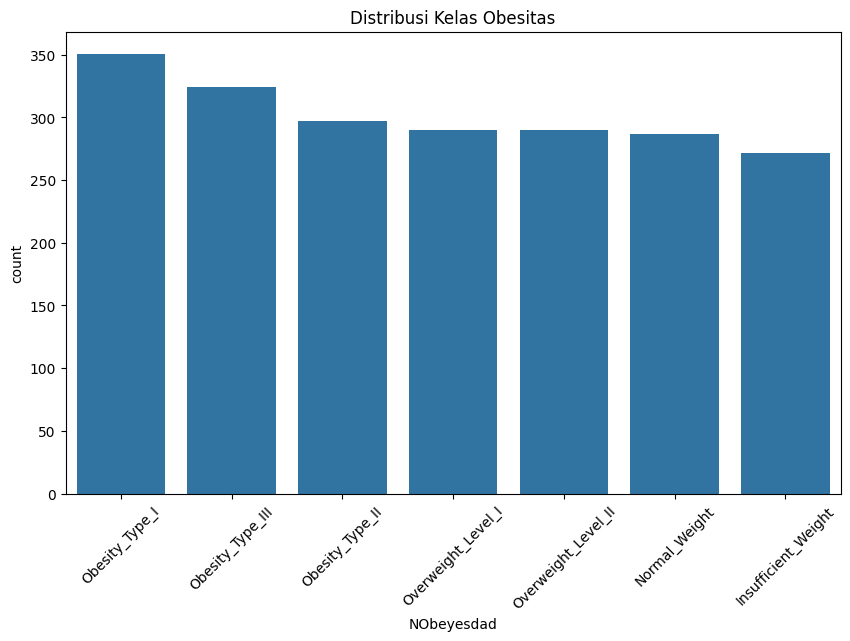

In [7]:
# Distribusi kelas target
plt.figure(figsize=(10,6))
sns.countplot(x='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas Obesitas')
plt.show()

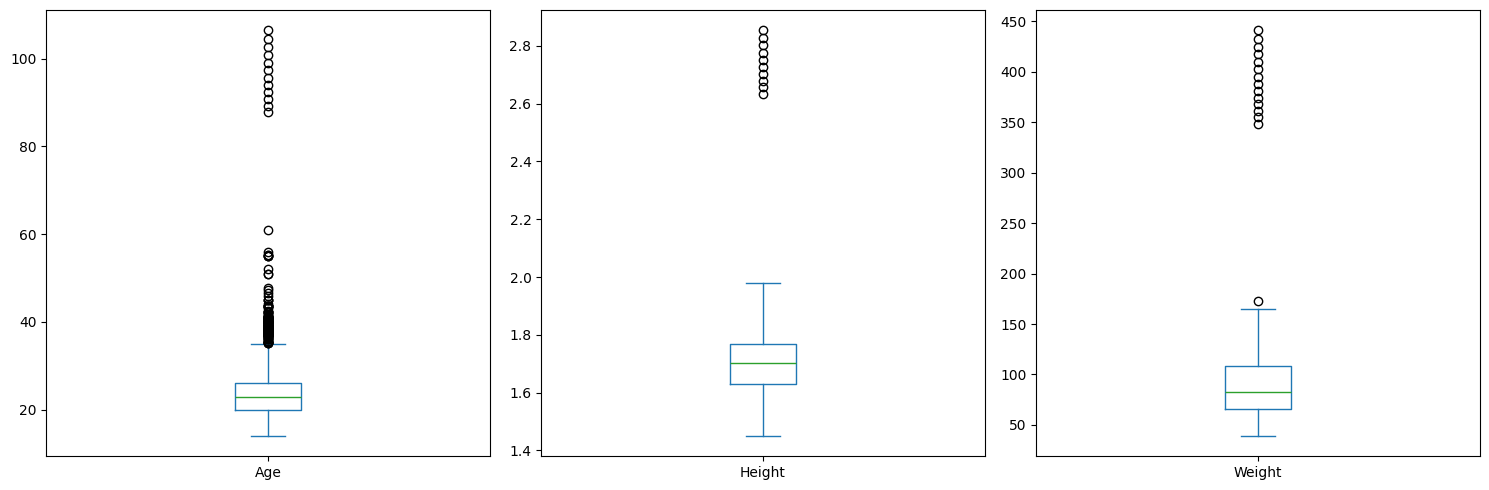

In [8]:
# Boxplot untuk deteksi outlier kolom numerik
num_cols = ['Age', 'Height', 'Weight']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df[num_cols].plot(kind='box', subplots=True, layout=(1,3), figsize=(15,5))
plt.tight_layout()
plt.show()

###  Kesimpulan EDA
- Dataset terdiri dari 17 kolom dan 2111 baris.
- Banyak kolom bertipe `object`, termasuk data numerik.
- Ada missing values dan data duplikat yang perlu ditangani.
- Distribusi kelas target tampak tidak seimbang.
- Beberapa kolom numerik menunjukkan kemungkinan adanya outlier.


# **PRE-PROCESSING**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Salin dataset asli untuk diproses
df_clean = df.copy()

<Figure size 1500x500 with 0 Axes>

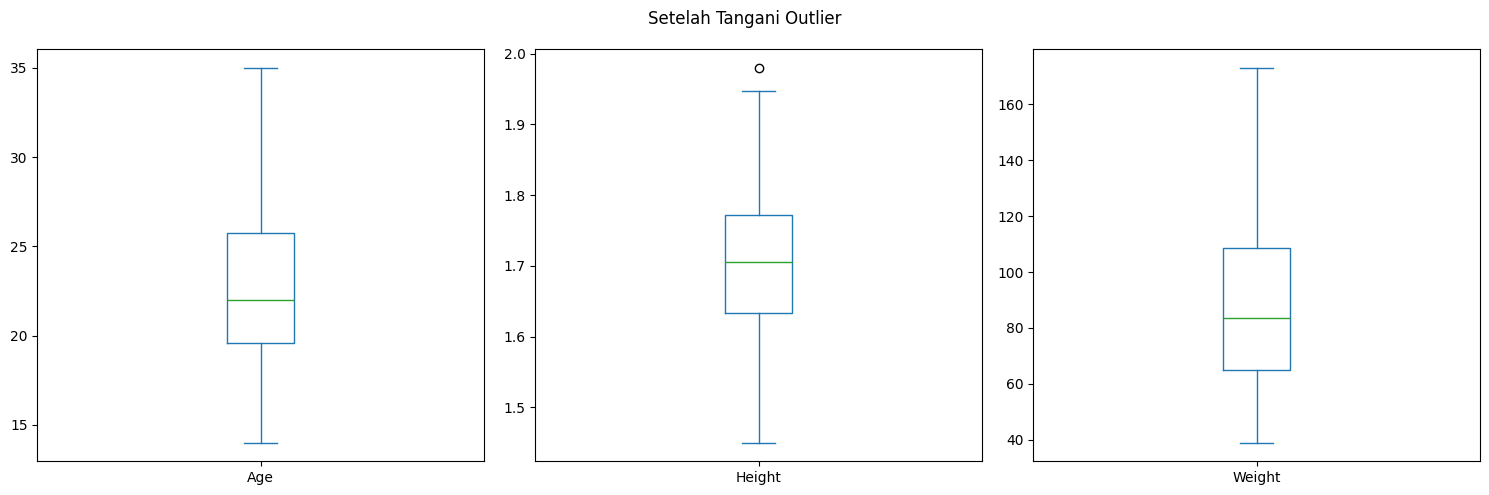

In [11]:
# Hapus missing values dan duplikat
df_clean.dropna(inplace=True)
df_clean.drop_duplicates(inplace=True)

# Tangani outlier (menggunakan IQR)
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

# Boxplot kolom numerik setelah penanganan outlier
plt.figure(figsize=(15,5))
df_clean[numeric_cols].plot(kind='box', subplots=True, layout=(1,3), figsize=(15,5), title="Setelah Tangani Outlier")
plt.tight_layout()
plt.show()

In [12]:
# Encode semua kolom kategorikal (kecuali target)
categorical_cols = df_clean.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('NObeyesdad')
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Encode kolom target
target_encoder = LabelEncoder()
df_clean['NObeyesdad'] = target_encoder.fit_transform(df_clean['NObeyesdad'])

# Cek hasil encode
display(df_clean.head())

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,1,1.62,64.0,4,1,147,359,1,1,427,2,0,718,3,4,1
1,21.0,1,1.52,56.0,3,1,642,359,2,2,1028,2,986,0,3,4,1
2,23.0,2,1.80,77.0,2,1,147,359,1,1,427,2,889,718,3,4,1
3,27.0,2,1.80,87.0,2,1,642,359,1,1,427,1,889,0,3,5,5
4,22.0,2,1.78,89.8,3,1,147,0,1,1,427,1,0,0,3,4,6


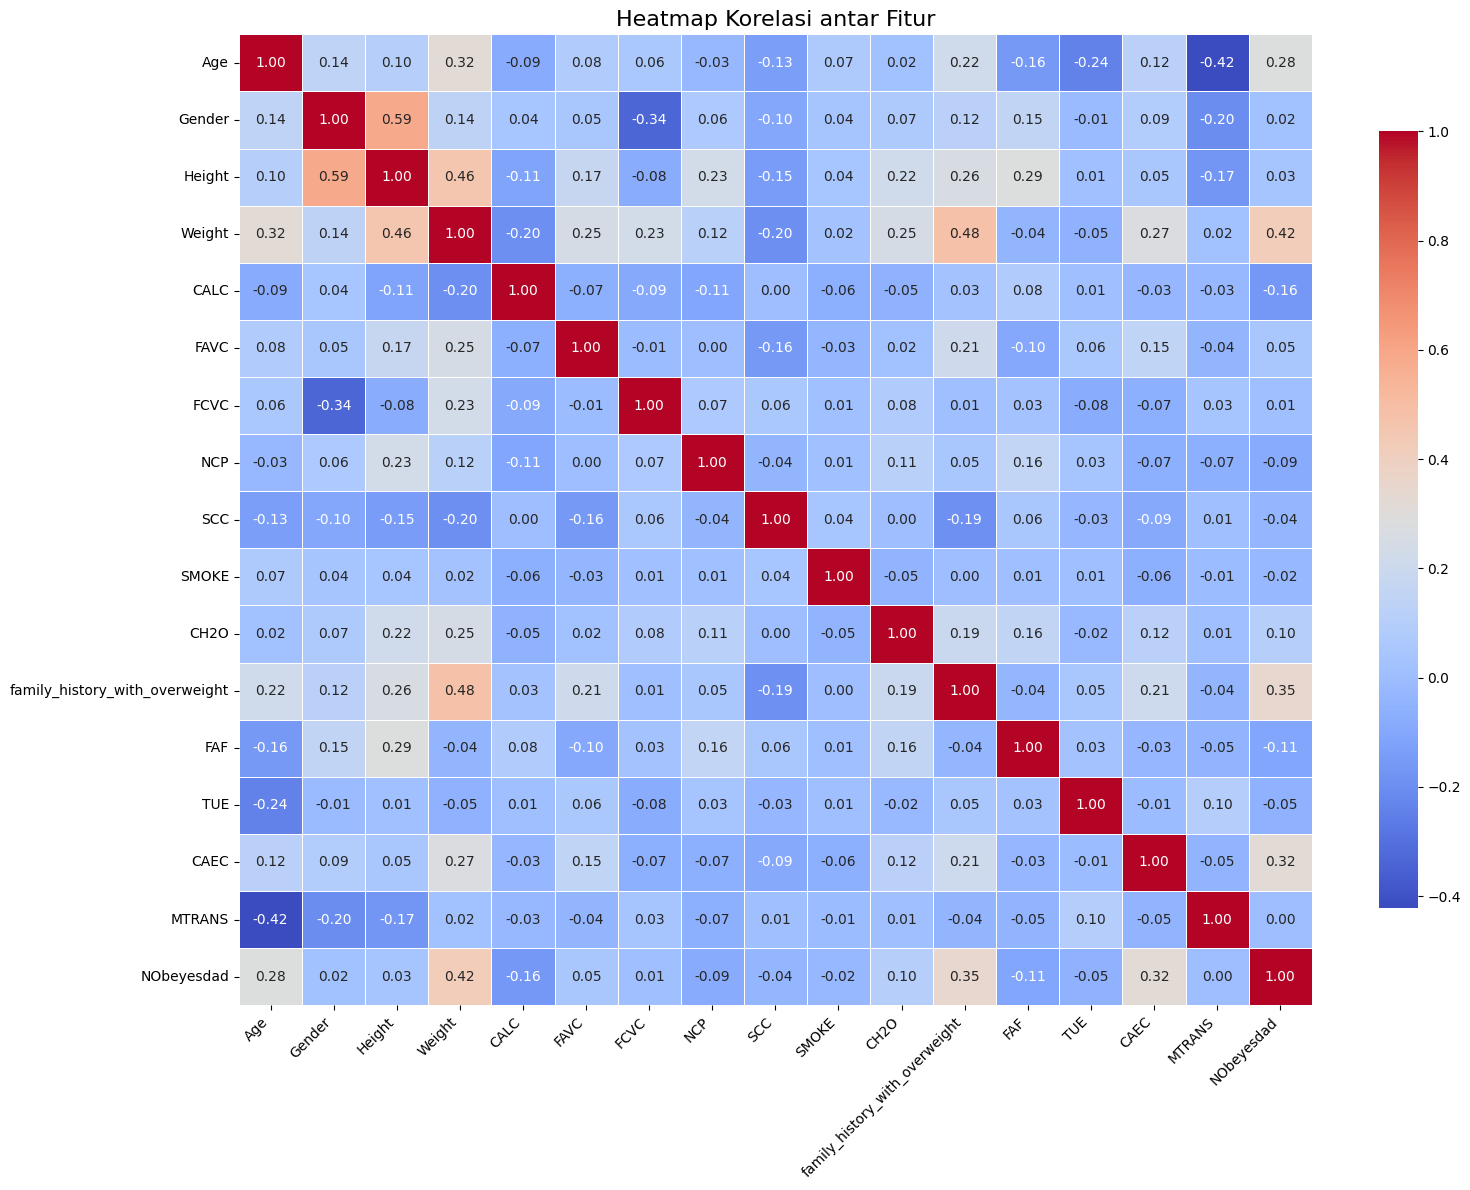

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur ukuran figure
plt.figure(figsize=(16, 12))

# Buat heatmap korelasi antar fitur
# - df_clean.corr(): hitung matriks korelasi antar kolom numerik
# - annot=True: tampilkan nilai korelasi di dalam kotak
# - fmt=".2f": format angka menjadi dua desimal
# - cmap='coolwarm': gunakan gradasi warna dari biru (negatif) ke merah (positif)
# - linewidths=0.5: beri garis pemisah antar kotak
# - cbar_kws={"shrink": 0.8}: kecilkan ukuran color bar
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title("Heatmap Korelasi antar Fitur", fontsize=16)

# Atur rotasi dan ukuran font pada sumbu X agar label kolom tidak saling tumpang tindih
plt.xticks(rotation=45, ha='right', fontsize=10)

# Atur rotasi dan ukuran font pada sumbu Y agar label terbaca horizontal
plt.yticks(rotation=0, fontsize=10)

# Atur layout agar elemen-elemen plot tidak saling menimpa
plt.tight_layout()

# Tampilkan plot heatmap
plt.show()

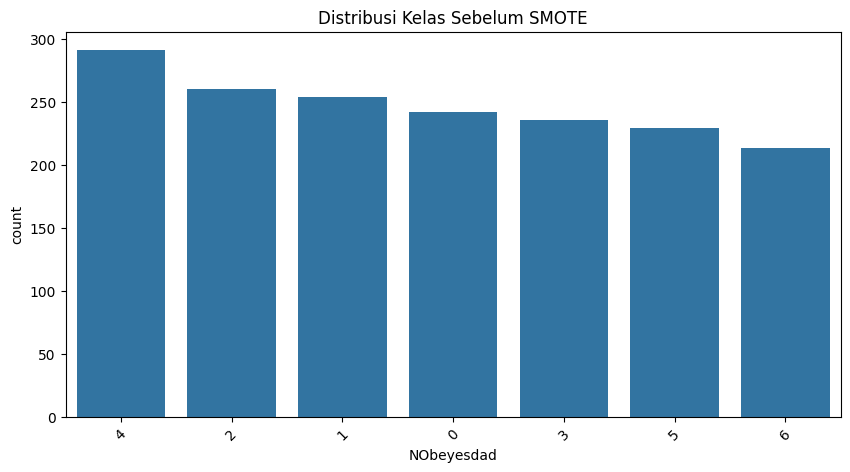

In [14]:
# Sebelum SMOTE
plt.figure(figsize=(10,5))
sns.countplot(x='NObeyesdad', data=df_clean, order=df_clean['NObeyesdad'].value_counts().index)
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xticks(rotation=45)
plt.show()

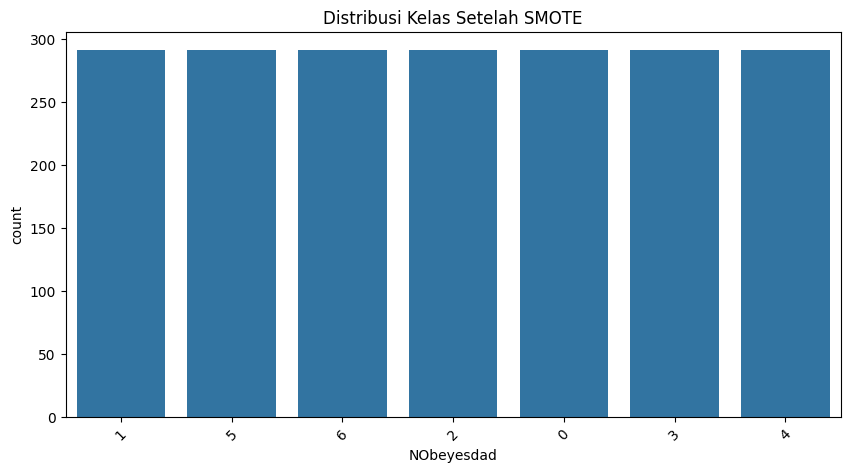

Ukuran data latih: (1629, 16)
Ukuran data uji: (408, 16)


In [15]:
# Pisahkan fitur dan target
X = df_clean.drop('NObeyesdad', axis=1)
y = df_clean['NObeyesdad']

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tangani ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Visualisasi distribusi kelas setelah SMOTE
plt.figure(figsize=(10,5))
sns.countplot(x=y_resampled, order=pd.Series(y_resampled).value_counts().index)
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xticks(rotation=45)
plt.show()

# Split data ke train dan test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

### Kesimpulan Preprocessing Data
- Missing values berhasil diatasi dengan menghapus baris yang mengandung nilai kosong karena jumlahnya relatif sedikit.

- Tidak ditemukan data duplikat dalam dataset.

- Semua fitur kategorikal telah dikonversi ke bentuk numerik menggunakan Label Encoding.

- Seluruh fitur digunakan karena tidak ada korelasi yang sangat rendah terhadap target.

- Data numerik telah dinormalisasi menggunakan StandardScaler agar berada dalam skala yang seragam.

- Distribusi kelas target yang sebelumnya tidak seimbang telah ditangani menggunakan teknik SMOTE.

- Dataset telah dibagi menjadi data latih dan data uji untuk keperluan pemodelan.